In [1]:
import numpy as np

from fastai.vision.all import *

%matplotlib inline

In [2]:
npz_file = np.load('../input/shuffled_train.npz')

X_train = npz_file['arr_0'] # get array from the first file 
y_train = npz_file['arr_1'] # get array from the second file

print(X_train.shape, y_train.shape)

(6394, 640, 128) (6394, 8)


In [3]:
npz_valid_file = np.load('../input/shuffled_valid.npz')

X_valid = npz_valid_file['arr_0']
y_valid = npz_valid_file['arr_1']

print(X_valid.shape, y_valid.shape)

(800, 640, 128) (800, 8)


In [4]:
X_combined = np.concatenate((X_train, X_valid))
print(X_combined.shape)

(7194, 640, 128)


In [5]:
y_combined = np.concatenate((y_train, y_valid))
print(y_combined.shape)

(7194, 8)


In [6]:
genres_dict = {
    'Electronic': 0, 
    'Experimental': 1, 
    'Folk': 2, 
    'Hip-Hop': 3, 
    'Instrumental': 4,
    'International': 5, 
    'Pop': 6, 
    'Rock': 7  
}

reverse_genres_dic = {v: k for k, v in genres_dict.items()}

num_train = X_train.shape[0]
num_valid = X_valid.shape[0]

def make_dataloaders_from_numpy_data(image, label):

    def get_x(i):
        return(image[i])

    def get_y(i):
        for idx, x in enumerate(label[i]):
            if (x == 1.0):
                genre = reverse_genres_dic[idx]
                return(genre) 

    num_total = image.shape[0]
    print(num_total)

    dblock = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        splitter=EndSplitter(valid_pct=(num_valid/num_total), valid_last=True),
        get_x=get_x,
        get_y=get_y
    )

    # pass in a list of index
    dls = dblock.dataloaders(list(range(num_total)))

    print(dls.train.vocab)

    return dls

dls = make_dataloaders_from_numpy_data(X_combined, y_combined)

7194
['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']


In [7]:
precision = Precision(average="macro")
recall = Recall(average="macro")
f1_score = F1Score(average="macro")

### Fine-Tuning 10 Epochs

##### ResNet-18

In [ ]:
resnet18_learner = vision_learner(dls, models.resnet18, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, precision, recall, f1_score])

/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
resnet18_learner.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,2.355784,1.777895,0.465000,0.447564,0.465000,0.452128,10:25


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.634798,1.511729,0.518750,0.511536,0.518750,0.511224,12:50
1,1.433047,1.547861,0.521250,0.515083,0.521250,0.513031,13:21
2,1.167276,1.751551,0.497500,0.520964,0.497500,0.500510,13:55
3,0.872410,1.742469,0.510000,0.512906,0.510000,0.506277,14:44
4,0.557732,2.017550,0.506250,0.533248,0.506250,0.504957,13:51
5,0.285507,2.088269,0.538750,0.525098,0.538750,0.527461,14:07
6,0.135498,2.075609,0.546250,0.542467,0.546250,0.540632,14:25
7,0.072311,2.130495,0.553750,0.545733,0.553750,0.545578,13:53
8,0.042566,2.119124,0.547500,0.550346,0.547500,0.544961,13:12
9,0.027475,2.133137,0.546250,0.545201,0.546250,0.541898,13:26


In [ ]:
resnet18_learner.recorder.plot_loss()

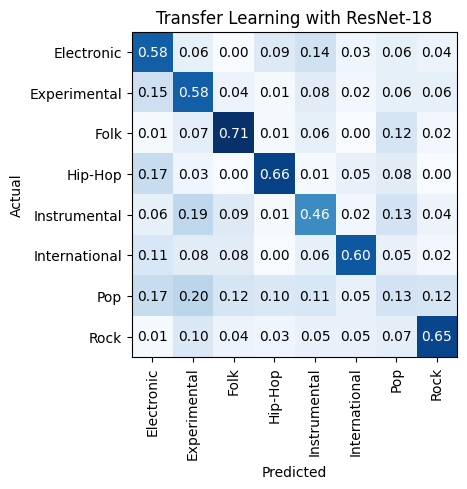

In [ ]:
resnet18_interp = ClassificationInterpretation.from_learner(resnet18_learner)
resnet18_interp.plot_confusion_matrix(title="Transfer Learning with ResNet-18", normalize=True)

##### ResNet-34

In [ ]:
resnet34_learner = vision_learner(dls, models.resnet34, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, precision, recall, f1_score])

/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
resnet34_learner.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.500142,1.662740,0.496250,0.492826,0.496250,0.491992,16:28


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.258162,1.430820,0.570000,0.563407,0.570000,0.563780,20:51
1,1.139677,1.616626,0.502500,0.521880,0.502500,0.488131,20:55
2,1.009025,1.694417,0.562500,0.561312,0.562500,0.556205,20:54
3,0.705304,1.921876,0.511250,0.513048,0.511250,0.500450,20:52
4,0.448606,1.983506,0.536250,0.538312,0.536250,0.532642,20:49
5,0.212356,1.866548,0.575000,0.576881,0.575000,0.570904,20:52
6,0.101787,2.133249,0.563750,0.562679,0.563750,0.559934,20:56
7,0.048385,2.094352,0.578750,0.568470,0.578750,0.570506,20:51
8,0.026153,2.135116,0.572500,0.571612,0.572500,0.568668,20:43
9,0.015483,2.084517,0.577500,0.574317,0.577500,0.573444,20:49


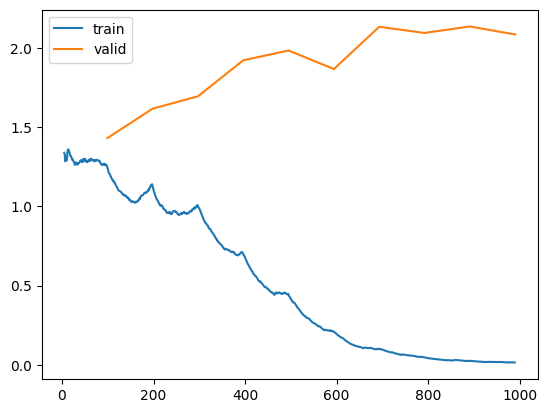

In [ ]:
resnet34_learner.recorder.plot_loss()

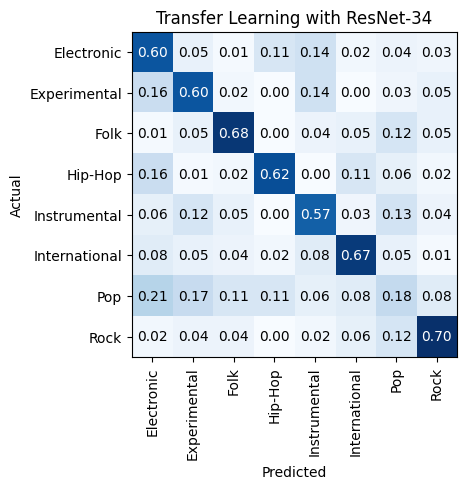

In [ ]:
resnet34_interp = ClassificationInterpretation.from_learner(resnet34_learner)
resnet34_interp.plot_confusion_matrix(title="Transfer Learning with ResNet-34", normalize=True)

### Fine-Tuning 1 Epoch

##### ResNet-18

In [9]:
resnet18_learner = vision_learner(dls, models.resnet18, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, precision, recall, f1_score])

/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
resnet18_learner.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,2.268291,1.704399,0.486250,0.480020,0.486250,0.476763,10:08


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.689251,1.473524,0.521250,0.509741,0.521250,0.510331,12:52


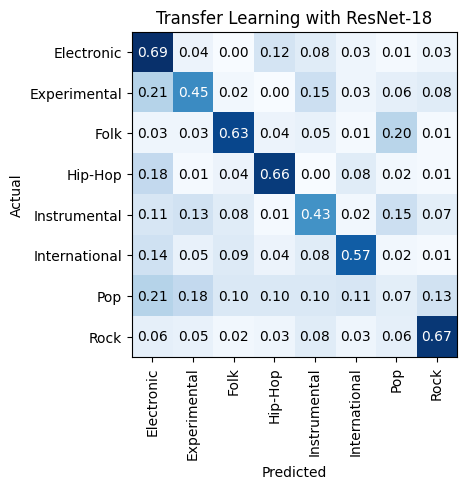

In [11]:
resnet18_interp = ClassificationInterpretation.from_learner(resnet18_learner)
resnet18_interp.plot_confusion_matrix(title="Transfer Learning with ResNet-18", normalize=True)

##### ResNet-34

In [12]:
resnet34_learner = vision_learner(dls, models.resnet34, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, precision, recall, f1_score])

/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
resnet34_learner.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,2.252820,1.732897,0.463750,0.463209,0.463750,0.456242,17:04


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.668323,1.474516,0.546250,0.532438,0.546250,0.532434,21:21


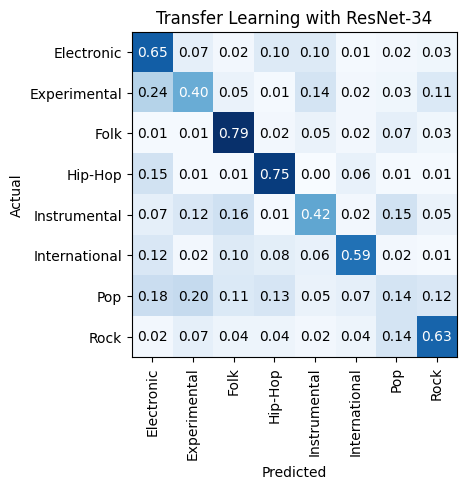

In [14]:
resnet34_interp = ClassificationInterpretation.from_learner(resnet34_learner)
resnet34_interp.plot_confusion_matrix(title="Transfer Learning with ResNet-34", normalize=True)

##### ResNet-50

In [15]:
resnet50_learner = vision_learner(dls, models.resnet50, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, precision, recall, f1_score])

/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
resnet50_learner.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,2.253274,1.869416,0.480000,0.480023,0.480000,0.471461,42:18


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.582087,1.512575,0.526250,0.505993,0.526250,0.511915,48:09


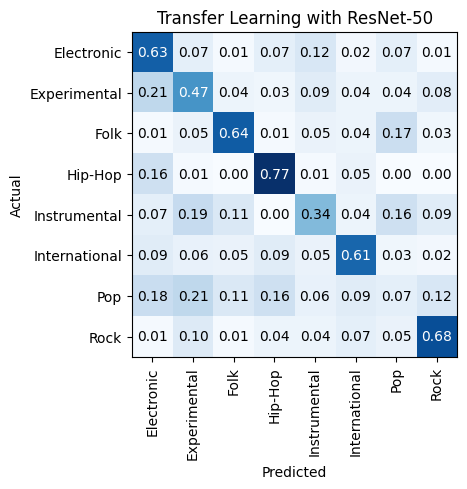

In [17]:
resnet50_interp = ClassificationInterpretation.from_learner(resnet50_learner)
resnet50_interp.plot_confusion_matrix(title="Transfer Learning with ResNet-50", normalize=True)

##### ResNet-101

In [18]:
resnet101_learner = vision_learner(dls, models.resnet101, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, precision, recall, f1_score])

/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/fionaochee/Library/Python/3.8/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
resnet101_learner.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,2.151151,1.867384,0.491250,0.483390,0.491250,0.483439,1:09:52


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.601231,1.380661,0.568750,0.551417,0.568750,0.554186,1:30:24


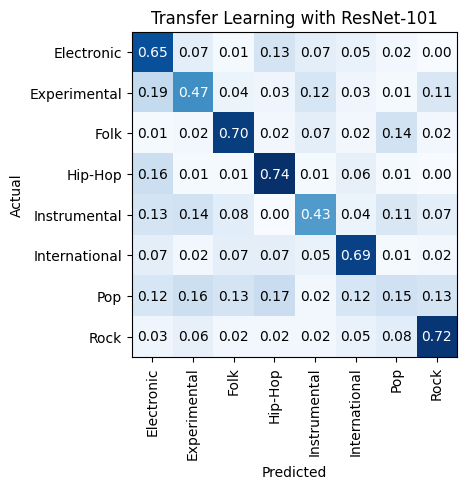

In [20]:
resnet101_interp = ClassificationInterpretation.from_learner(resnet101_learner)
resnet101_interp.plot_confusion_matrix(title="Transfer Learning with ResNet-101", normalize=True)

##### ResNet-152

In [ ]:
resnet152_learner = vision_learner(dls, models.resnet152, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, precision, recall, f1_score])

In [ ]:
resnet152_learner.fine_tune(1)

In [ ]:
resnet152_interp = ClassificationInterpretation.from_learner(resnet152_learner)
resnet101_interp.plot_confusion_matrix(title="Transfer Learning with ResNet-152", normalize=True)